# Pisa data 2012

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

### Investigation Overview
This presentation first shows the correlation between the scores obtained by students in each of the 3 disciplines. We see this through a series of 3 scatterplots comparing disciplines two by two.

Afterwards, we can see the relationship between each of the 4 background independent variables and the scores, using the violin and box plots obtained in the exploratory visualization

In [5]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

# set color for all plots
base_color = sns.color_palette()[0]

In [6]:
# load in the dataset into a pandas dataframe
df1 = pd.read_csv('pisa2012_clean.csv')

## Distribution of the scores

From the visualization below,

- we can deduce that the scores follows a clear normal distribution. 
- we could also deduce there may be a possibility that they use the same scoring system as the three scores fall between 200 - 800 points.
- The median for all 3 disciplines is also very similar, slightly below 500. 
- The similarity between the three plots could indicate that students performed equally well in all 3 disciplines (math, science and reading

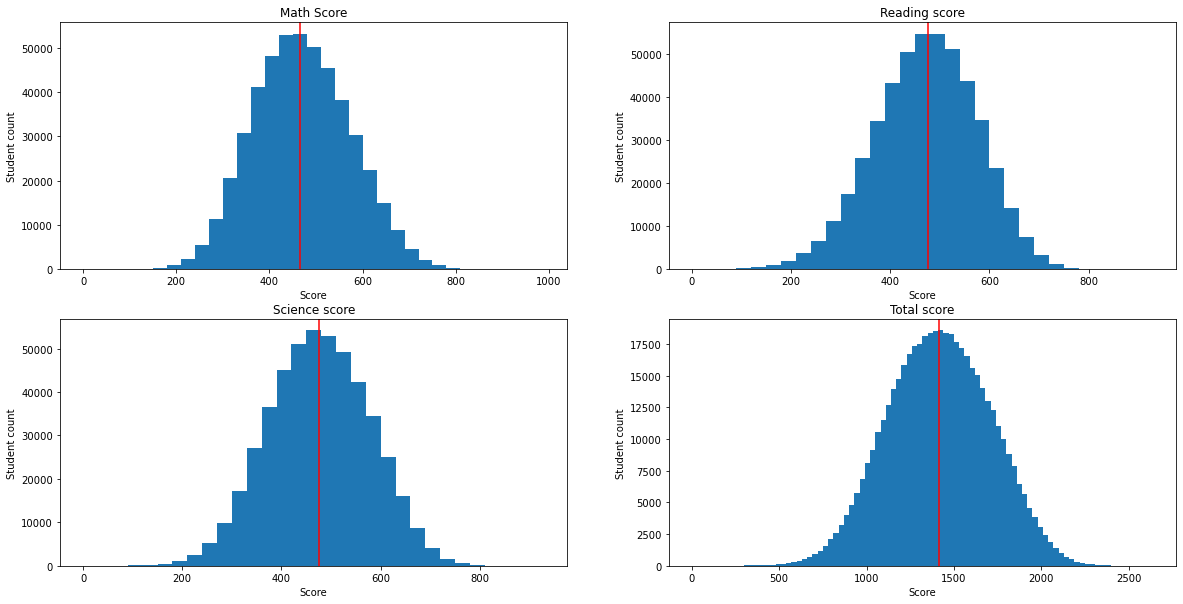

In [7]:
#set a large figure size for the subplots
plt.figure(figsize=[20, 10])

#set the bin
binsize = 30

# histogram on top-left, for math score
# 2 row, 2 cols, subplot 1
ax1 = plt.subplot(2, 2, 1) 
ax1_bin = np.arange(0, df1['score_math'].max()+binsize, binsize)
plt.hist(data = df1, x ='score_math', bins = ax1_bin)
plt.xlabel('Score')
plt.ylabel('Student count')
plt.axvline(x=df1.score_math.median(), color='r')
ax1.set_title("Math Score")

# histogram on top-right, for reading score
# 2 row, 2 cols, subplot 2
ax2 = plt.subplot(2, 2, 2) 
ax2_bin = np.arange(0, df1['score_reading'].max()+binsize, binsize)
plt.hist(data = df1, x ='score_reading', bins = ax2_bin)
plt.xlabel('Score')
plt.ylabel('Student count')
plt.axvline(x=df1.score_reading.median(), color='r')
ax2.set_title("Reading score")

# histogram on bottom-left, for science score
# 2 row, 2 cols, subplot 3
ax3 = plt.subplot(2, 2, 3) 
ax3_bin = np.arange(0, df1['score_science'].max()+binsize, binsize)
plt.hist(data = df1, x ='score_science', bins = ax3_bin)
plt.xlabel('Score')
plt.ylabel('Student count')
plt.axvline(x=df1.score_science.median(), color='r')
ax3.set_title("Science score")

# histogram on bottom-left, for total score
# 2 row, 2 cols, subplot 4
ax4 = plt.subplot(2, 2, 4) 
ax4_bin = np.arange(0, df1['score_total'].max()+binsize, binsize)
plt.hist(data = df1, x ='score_total', bins = ax4_bin)
plt.xlabel('Score')
plt.ylabel('Student count')
plt.axvline(x=df1.score_total.median(), color='r')
ax4.set_title("Total score")

#saving the picture
plt.savefig('images/fig1.jpg', bbox_inches='tight')    
plt.show();

## Proportion of countries represented

The visualization below shows that:

- Not all the countries are equally represented
- Mexico leads the count with nearly 35000 students and Liechtenstein is the least represented country with less than 1000

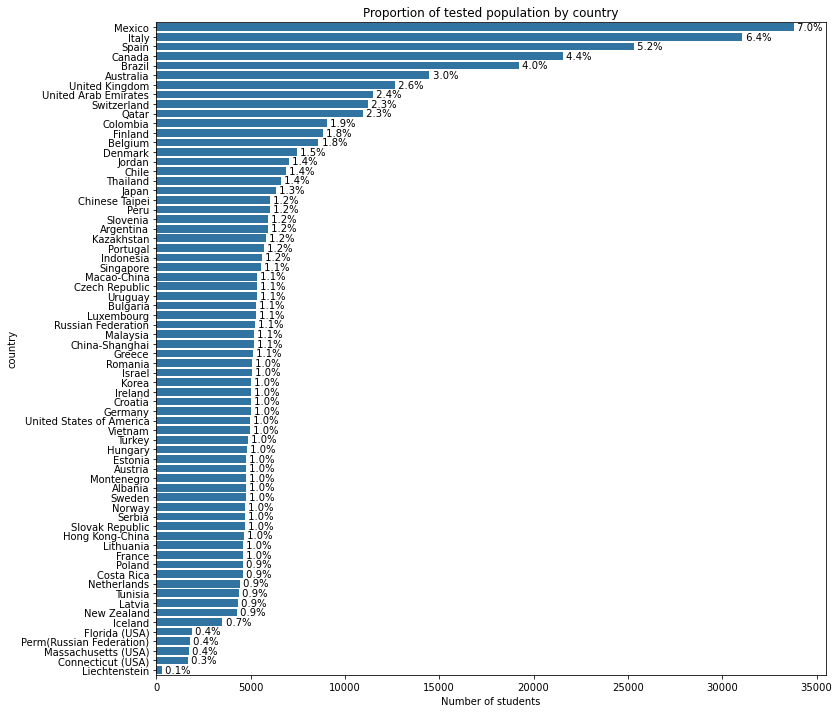

In [8]:
#define proportions
country_counts = df1.country.value_counts()
no_student = country_counts.sum()

#defining the figure and drawing the plot
plt.figure(figsize=[12,12])
country_labels = country_counts.index
sns.countplot(data = df1, y = 'country', color=base_color, order=country_labels)
plt.title('Proportion of tested population by country')
plt.xlabel('Number of students')
plt.savefig('images/fig3.jpg', bbox_inches='tight')

# print the proportion text on the bars
for i in range (country_counts.shape[0]):
    count = country_counts[i]
    pct_string = ' {:0.1f}%'.format(count*100/no_student)
    plt.text(count+1, i, pct_string, va='center')

## Correlation between the three score variables

From the visulaization below we could deduce that

- The three of them have a pretty solid positive correlation
- This positive correlation indicates that students who perform better in one of the disciplines tend to perform equally well in the other two

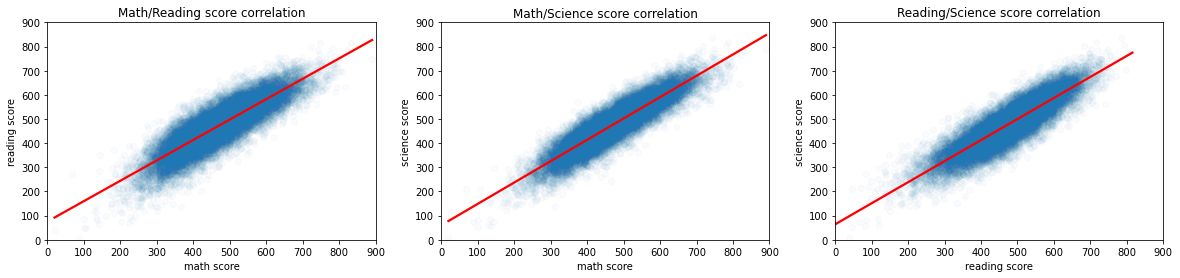

In [9]:
# create the sample
df_sample = df1.sample(20000)

# define figure size for subplots
plt.figure(figsize = [20, 4])

# histogram on the left
# 1 row, 3 cols, subplot 1
ax1 = plt.subplot(1, 3, 1) 
sns.regplot(data = df_sample, x = 'score_math', y = 'score_reading', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('math score')
plt.ylabel('reading score')
ax1.set_title("Math/Reading score correlation")

# histogram in the middle
# 1 row, 3 cols, subplot 2
ax2 = plt.subplot(1, 3, 2) 
sns.regplot(data = df_sample, x = 'score_math', y = 'score_science', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('math score')
plt.ylabel('science score')
ax2.set_title("Math/Science score correlation")

# histogram on the right
# 1 row, 3 cols, subplot 3
ax3 = plt.subplot(1, 3, 3) 
sns.regplot(data = df_sample, x = 'score_reading', y = 'score_science', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('reading score')
plt.ylabel('science score')
ax3.set_title("Reading/Science score correlation")

# set the same axis ranges for both charts
plots = [ax1, ax2, ax3]
for ax in plots:
    ax.set_xlim([0, 900])
    ax.set_ylim([0, 900])
    
plt.savefig('images/fig9.jpg', bbox_inches='tight');

## Score comparison based on student's gender

The visualization above below that

- while the gender distribution between the male and the female is equal. 
- There is a slightly better performance from the females in the Reading 
- The male performed slightly better in the math aspect
- For science, both genders present equivalent results, despite male students having a larger interquartile range, but this isn't indicative of a better or worse performance.

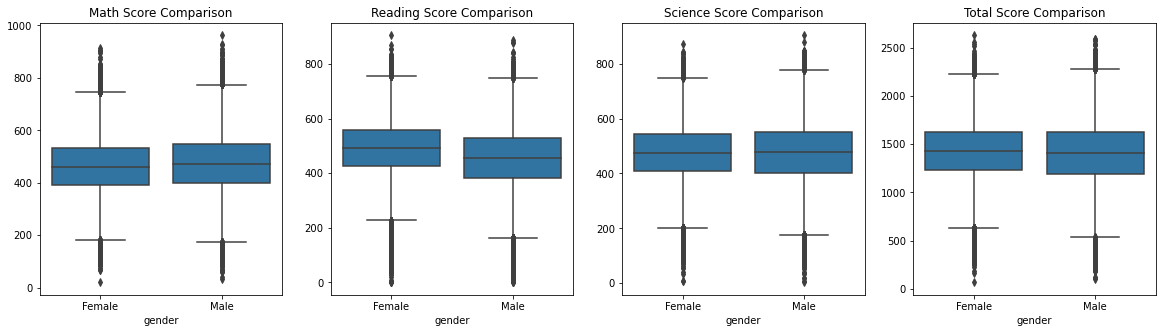

In [24]:
# set a larger figure size for subplots
plt.figure(figsize = [20, 5])

# 1 row, 4 cols, subplot 1
ax1 = plt.subplot(1, 4, 1) 
sns.boxplot(data=df1, x='gender', y='score_math', color=base_color)
ax1.set_title("Math Score Comparison");

# 1 row, 4 cols, subplot 2
ax2 = plt.subplot(1, 4, 2) 
sns.boxplot(data=df1, x='gender', y='score_reading', color=base_color)
ax2.set_title("Reading Score Comparison");

# 1 row, 4 cols, subplot 3
ax3 = plt.subplot(1, 4, 3) 
sns.boxplot(data=df1, x='gender', y='score_science', color=base_color)
ax3.set_title("Science Score Comparison");

# 1 row, 4 cols, subplot 4
ax4 = plt.subplot(1, 4, 4) 
sns.boxplot(data=df1, x='gender', y='score_total', color=base_color)
ax4.set_title("Total Score Comparison");

# remove y-labels to avoid redundancy
plots = [ax1, ax2, ax3, ax4]
for ax in plots:
    ax.set_ylabel(None)
    
plt.savefig('images/fig10.jpg', bbox_inches='tight');

## Score comparison based on OECD membership

From the visualization below, we can deduce that

- It's very clear on all 4 violin plots that OECD country students obtain a higher score than students from non-OECD countries.

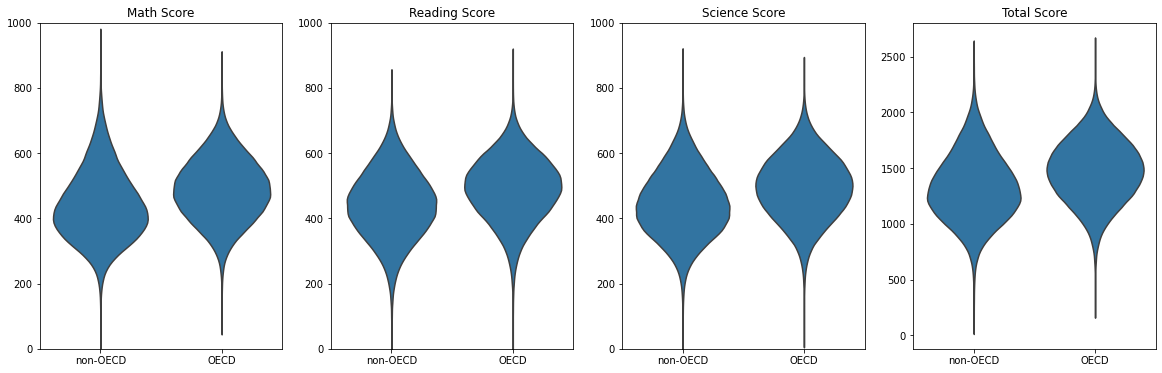

In [25]:
# set a larger figure size for subplots
plt.figure(figsize = [20, 6])

# 1 row, 4 cols, subplot 1
ax1 = plt.subplot(1, 4, 1) 
sns.violinplot(data=df1, x='oecd', y='score_math', color=base_color, inner=None)
ax1.set_title("Math Score");

# 1 row, 4 cols, subplot 2
ax2 = plt.subplot(1, 4, 2) 
sns.violinplot(data=df1, x='oecd', y='score_reading', color=base_color, inner=None)
ax2.set_title("Reading Score");

# 1 row, 4 cols, subplot 3
ax3 = plt.subplot(1, 4, 3) 
sns.violinplot(data=df1, x='oecd', y='score_science', color=base_color, inner=None)
ax3.set_title("Science Score");

# 1 row, 4 cols, subplot 4
ax4 = plt.subplot(1, 4, 4) 
sns.violinplot(data=df1, x='oecd', y='score_total', color=base_color, inner=None)
ax4.set_title("Total Score")

# remove axis names and rename x-ticklabels
plots = [ax1, ax2, ax3, ax4]
for ax in plots:
    ax.set_xticklabels(('non-OECD', 'OECD'))
    ax.set(xlabel=None, ylabel=None)
    
plots2 = [ax1, ax2, ax3]
for ax in plots2:
    ax.set_ylim([0, 1000])
    
plt.savefig('images/fig11.jpg', bbox_inches='tight');

## Score comparison based on parent's education level

From the visualization below, we can deduce  that

- We can see again a high impact from the parent's level of education on the total score obtained by the students. 
- The students whose mother has an education level equal or higher than Upper Secondary School obtain better scores than those whose mother's achieved education is lower.
- The students whose father has an education level equal or higher than Upper Secondary School obtain better scores than those whose father's achieved education is lower.

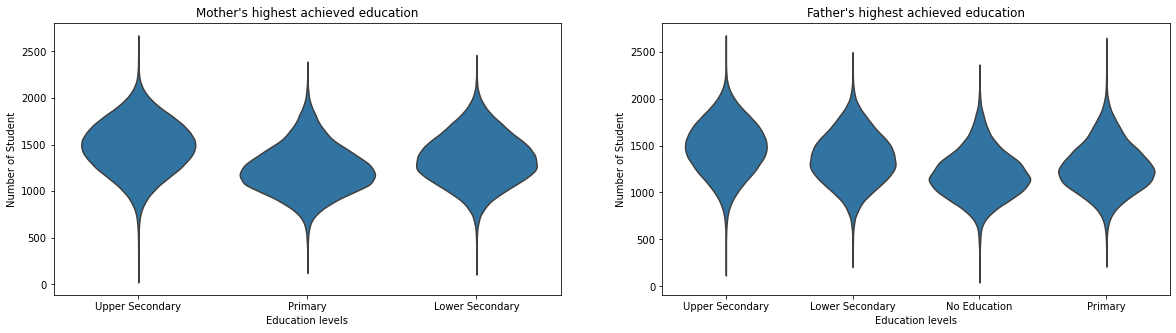

In [26]:
# figure size
plt.figure(figsize = [20, 5])

# plot
ax1 = plt.subplot(1,2,1)
ax1 = sns.violinplot(data=df1, x='education_mother', y='score_total', color=base_color, inner=None)
ax1.set_title("Mother\'s highest achieved education");
ax1.set(ylabel="Mother\'s highest achieved education", xlabel=None)


ax2 = plt.subplot(1,2,2)
ax2 = sns.violinplot(data=df1, x='education_father', y='score_total', color=base_color, inner=None)
ax2.set_title("Father\'s highest achieved education");
ax2.set(ylabel="Father\'s highest achieved education", xlabel=None)

# remove axis names and rename x-ticklabels
plots = [ax1, ax2]
for ax in plots:
    ax.set(ylabel="Number of Student", xlabel='Education levels')

plt.savefig('images/fig13.jpg', bbox_inches='tight');

## Score comparison based on internet use at school

From the visualization below, we can deduce that 

- There is no clear difference in the scores obtained in any of the disciplines between students who use and who don't use internet at school.

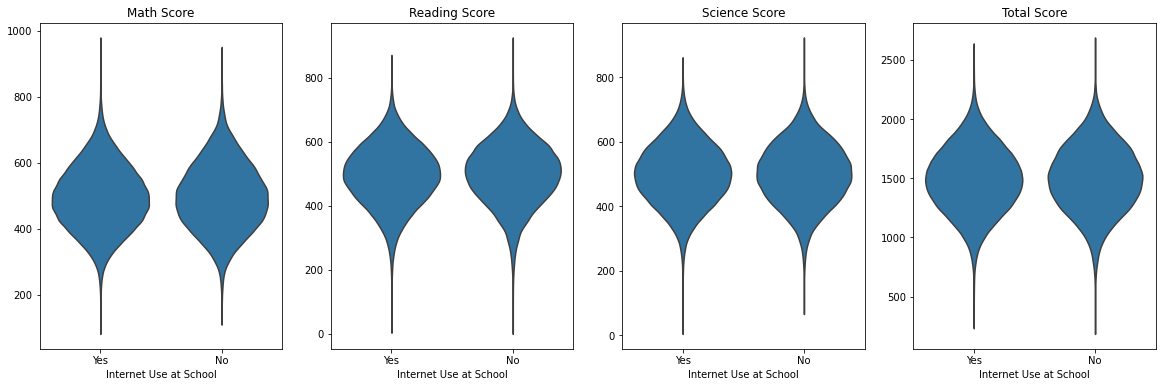

In [27]:
# set a larger figure size for subplots
plt.figure(figsize = [20, 6])

# 1 row, 4 cols, subplot 1
ax1 = plt.subplot(1, 4, 1) 
sns.violinplot(data=df1, x='school_internet', y='score_math', color=base_color, inner=None)
ax1.set_title("Math Score")

# 1 row, 4 cols, subplot 2
ax2 = plt.subplot(1, 4, 2) 
sns.violinplot(data=df1, x='school_internet', y='score_reading', color=base_color, inner=None)
ax2.set_title("Reading Score")

# 1 row, 4 cols, subplot 3
ax3 = plt.subplot(1, 4, 3) 
sns.violinplot(data=df1, x='school_internet', y='score_science', color=base_color, inner=None)
ax3.set_title("Science Score")

# 1 row, 4 cols, subplot 4
ax4 = plt.subplot(1, 4, 4) 
sns.violinplot(data=df1, x='school_internet', y='score_total', color=base_color, inner=None)
ax4.set_title("Total Score")

# remove axis names and rename x-ticklabels
plots = [ax1, ax2, ax3, ax4]
for ax in plots:
    ax.set(xlabel="Internet Use at School", ylabel=None)
    
plt.savefig('images/fig12.jpg', bbox_inches='tight');

##  Score comparison based on Age

from the visualization below, we can deduce that

- The student age have a slight positive correlation with the scores all together. 

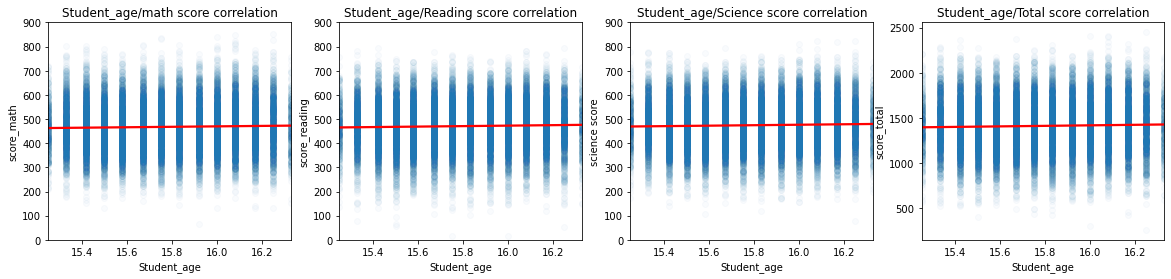

In [28]:
# create the sample
df_sample = df1.sample(20000)

# define figure size for subplots
plt.figure(figsize = [20, 4])

# histogram on the left
# 1 row, 4 cols, subplot 1
ax1 = plt.subplot(1, 4, 1) 
sns.regplot(data = df_sample, x = 'Student_age', y = 'score_math', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('Student_age')
plt.ylabel('score_math')
ax1.set_title("Student_age/math score correlation")

# histogram in the middle
# 1 row, 4 cols, subplot 2
ax2 = plt.subplot(1, 4, 2) 
sns.regplot(data = df_sample, x = 'Student_age', y = 'score_reading', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('Student_age')
plt.ylabel('score_reading')
ax2.set_title("Student_age/Reading score correlation")

# histogram on the right
# 1 row, 4 cols, subplot 3
ax3 = plt.subplot(1, 4, 3) 
sns.regplot(data = df_sample, x = 'Student_age', y = 'score_science', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('Student_age')
plt.ylabel('science score')
ax3.set_title("Student_age/Science score correlation")

# histogram on the right
# 1 row, 4 cols, subplot 4
ax4 = plt.subplot(1, 4, 4) 
sns.regplot(data = df_sample, x = 'Student_age', y = 'score_total', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('Student_age')
plt.ylabel('score_total')
ax4.set_title("Student_age/Total score correlation")

# set the same axis ranges for both charts
plots = [ax1, ax2, ax3]
for ax in plots:
    ax.set_ylim([0, 900])
    
plt.savefig('images/fig15.jpg', bbox_inches='tight');

## Score comparison based on Student perseverance

From the visualization below, we can deduce that

- There is a clear positive correlation between perserverance and sutdent score in all the disciplines
- The more the student is able to persevere, the more the student score
- The majority of the students have a perseverance level between -1 and 1

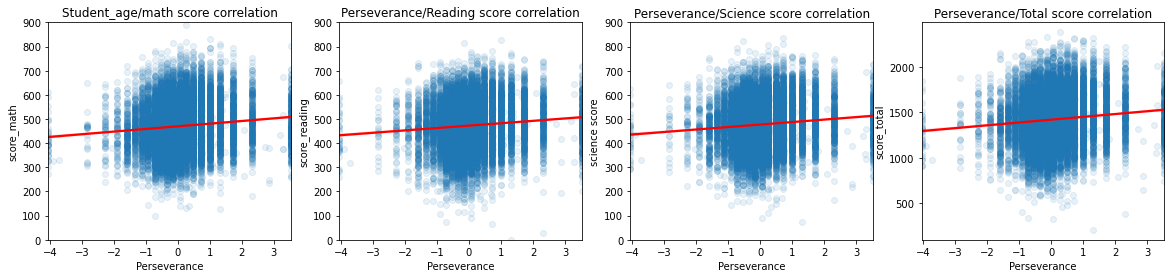

In [29]:
# create the sample
df_sample = df1.sample(20000)

# define figure size for subplots
plt.figure(figsize = [20, 4])

# histogram on the left
# 1 row, 4 cols, subplot 1
ax1 = plt.subplot(1, 4, 1) 
sns.regplot(data = df_sample, x = 'Perseverance', y = 'score_math', scatter_kws={'alpha':1/10}, line_kws={"color": "red"});
plt.xlabel('Perseverance')
plt.ylabel('score_math')
ax1.set_title("Student_age/math score correlation")

# histogram in the middle
# 1 row, 4 cols, subplot 2
ax2 = plt.subplot(1, 4, 2) 
sns.regplot(data = df_sample, x = 'Perseverance', y = 'score_reading', scatter_kws={'alpha':1/10}, line_kws={"color": "red"});
plt.xlabel('Perseverance')
plt.ylabel('score_reading')
ax2.set_title("Perseverance/Reading score correlation")

# histogram on the right
# 1 row, 4 cols, subplot 3
ax3 = plt.subplot(1, 4, 3) 
sns.regplot(data = df_sample, x = 'Perseverance', y = 'score_science', scatter_kws={'alpha':1/10}, line_kws={"color": "red"});
plt.xlabel('Perseverance')
plt.ylabel('science score')
ax3.set_title("Perseverance/Science score correlation")

# histogram on the right
# 1 row, 4 cols, subplot 4
ax4 = plt.subplot(1, 4, 4) 
sns.regplot(data = df_sample, x = 'Perseverance', y = 'score_total', scatter_kws={'alpha':1/10}, line_kws={"color": "red"});
plt.xlabel('Perseverance')
plt.ylabel('score_total')
ax4.set_title("Perseverance/Total score correlation")

# set the same axis ranges for both charts
plots = [ax1, ax2, ax3]
for ax in plots:
    ax.set_ylim([0, 900])
    
plt.savefig('images/fig16.jpg', bbox_inches='tight');

## Score comparison based on gender and oecd countries

The chart below shows the colour difference for each pair of columns. We have assessed before the performance difference based on gender and OECD status. What we want to know here is if the difference by gender gets accentuated or not based on the OECD variable.

We can observe, very lightly, that female students from non-OECD countries perform better than female students from OECD countries when compared to male students. The science boxplot is probably the one where this difference is more obvious. While in OECD countries the median score from male students is higher, in non-OECD countries the median score from female students is higher. The interquartile ranges from both are also slightly shifted in these opposite directions.

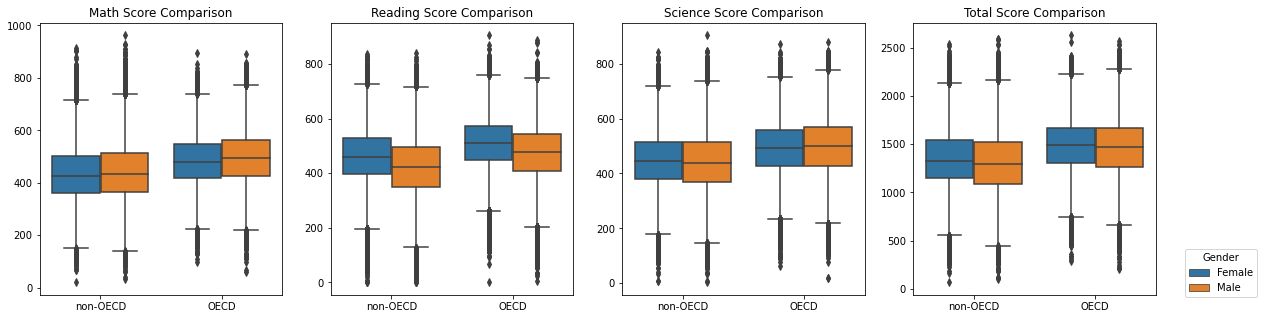

In [10]:
# set a larger figure size for subplots
plt.figure(figsize = [20, 5])

# 1 row, 4 cols, subplot 1
ax1 = plt.subplot(1, 4, 1) 
sns.boxplot(data=df1, x='oecd', y='score_math', hue='gender')
ax1.set_title("Math Score Comparison");

# 1 row, 4 cols, subplot 2
ax2 = plt.subplot(1, 4, 2) 
sns.boxplot(data=df1, x='oecd', y='score_reading', hue='gender')
ax2.set_title("Reading Score Comparison");

# 1 row, 4 cols, subplot 3
ax3 = plt.subplot(1, 4, 3) 
sns.boxplot(data=df1, x='oecd', y='score_science', hue='gender')
ax3.set_title("Science Score Comparison");

# 1 row, 4 cols, subplot 4
ax4 = plt.subplot(1, 4, 4) 
sns.boxplot(data=df1, x='oecd', y='score_total', hue='gender')
ax4.set_title("Total Score Comparison");

# remove axis names and rename x-ticklabels
plots = [ax1, ax2, ax3, ax4]
for ax in plots:
    ax.set_xticklabels(('non-OECD', 'OECD'))
    ax.set(xlabel=None, ylabel=None)
    
# clean and position the legend
box = ax4.get_position()
ax4.set_position([box.x0, box.y0, box.width, box.height])
ax4.legend(title="Gender", loc='center left', bbox_to_anchor=(1.1, 0.08))
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()

plt.savefig('images/fig17.jpg', bbox_inches='tight')
plt.show();

In [34]:
!jupyter nbconvert "Pisa2012_Part_II_slide_deck.ipynb" --to slides --post serve --no-input --no-prompt

^C
